<h3><u><center> Defining Problem Statement and Analysing basic metrics </center></u></h3>
<ul>
    <li> Market research team @ Aerofit wants our help to to provide a better recommendation of the treadmills to the new customers </li>
    <li> Perform descriptive analytics to create a customer profile for each AeroFit treadmill product by developing appropriate tables and charts. </li>
<li> For each AeroFit treadmill product, construct two-way contingency tables and compute all conditional and marginal probabilities along with their insights/impact on the business. </li> 
</ul>

<b> Product Portfolio: </b>

The KP281 is an entry-level treadmill that sells for USD 1,500.
<br>The KP481 is for mid-level runners that sell for USD 1,750.
<br>The KP781 treadmill is having advanced features that sell for USD 2,500.

In [1]:
# Loading all necessary libraries
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import warnings # to supress any warnings coming out
warnings.filterwarnings("ignore")

In [638]:
aerofit = pd.read_csv("aerofit_treadmill.csv")
aerofit.head(5)

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47


In [4]:
aerofit.shape

(180, 9)

In [9]:
aerofit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


In [10]:
aerofit.describe()

,Age,Education,Usage,Fitness,Income,Miles
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,28.788889,15.572222,3.455556,3.311111,53719.577778,103.194444
std,6.943498,1.617055,1.084797,0.958869,16506.684226,51.863605
min,18.000000,12.000000,2.000000,1.000000,29562.000000,21.000000
25%,24.000000,14.000000,3.000000,3.000000,44058.750000,66.000000
50%,26.000000,16.000000,3.000000,3.000000,50596.500000,94.000000
75%,33.000000,16.000000,4.000000,4.000000,58668.000000,114.750000
max,50.000000,21.000000,7.000000,5.000000,104581.000000,360.000000


In [11]:
aerofit.describe(include = object).T

,count,unique,top,freq
Product,180,3,KP281,80
Gender,180,2,Male,104
MaritalStatus,180,2,Partnered,107


In [27]:
aerofit.isnull().sum()

Product          0
Age              0
Gender           0
Education        0
MaritalStatus    0
Usage            0
Fitness          0
Income           0
Miles            0
dtype: int64

In [36]:
print(aerofit["Product"].value_counts())
print("\n",aerofit["Product"].value_counts(normalize = True))
print("\n",aerofit["Product"].unique())

KP281    80
KP481    60
KP781    40
Name: Product, dtype: int64

 KP281    0.444444
KP481    0.333333
KP781    0.222222
Name: Product, dtype: float64

 ['KP281' 'KP481' 'KP781']


In [31]:
print(aerofit["Gender"].value_counts())
print("\n",aerofit["Gender"].unique())

Male      104
Female     76
Name: Gender, dtype: int64

 ['Male' 'Female']


In [33]:
print(aerofit["MaritalStatus"].value_counts())
print("\n", aerofit["MaritalStatus"].unique())

Partnered    107
Single        73
Name: MaritalStatus, dtype: int64

 ['Single' 'Partnered']


<h3><u> Observations </u></h3>
<ul>
    <li><b> Categorical Data </b></li>
    <ol>
        <li> No null/missing values are present </li>
        <li> There are 3 different treadmills present in the data of model no - KP281, KP481, KP781 with share in sales of - 44%, 33%, and 22% respectively. This is expected since the KP781 is 1.66 times more expensive than KP281, whereas price of KP481 is in the middle </li>
        <li> Males are Females are the 2 genders in the data, with more male customers than females</li>
        <li> There are 107 married couples and 73 single couples. Out of the married couples it may be possible that more than 1 person might be using the treadmil</li>
    </ol>
    <br>
    <li><b> Numerical Data </b></li>
    <ol>
        <li> No null/missing values are present </li>
        <li> People of ranges 18 - 50 are customers of Aerofit (only adults). Most customers' ages lie between 24-33 years</li>
        <li> The distrubution of Education is very uniform, almost everyone seems to have studied for 10+ years (till high school), we can assume our customer base is decently educated and there is low std.deviation (1.67 yrs) </li>
        <li> People use Aerofit's treadmills for 3-4 days per week. The highlight is that the lowest usage is 2 days per week, which means Aerofit's treadmills are being used well (no instance of 0 usage) </li>
        <li> Most people have ranked themselves between a 3-4 range of fitness values, indicating that the average user is moderately fit/active. Number of inactive people seems low which corroborates the data we saw in the previous observation</li>
        <li> Income of the average user is heavily concentrated between the 45k - 60k range, which means there are few customers who are quite rich as compared to the median [Outliers] </li>
        <li> There is quite a big difference in miles worked out on the treadmill, as compared to the 25%, 50% and 75% values, standard deviation is very high. Which means some people are working out much more than the others [Outliers] </li>
    </ol>
</ul>

<h3><u><center> Visual analysis of data [Outliers and Distribution] </center></u></h3>

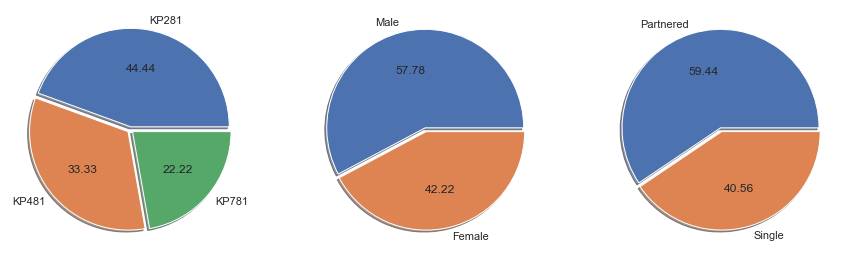

In [133]:
fig, axs = plt.subplots(nrows = 1,  ncols = 3,  figsize=(15, 6))

axs[0].pie(aerofit["Product"].value_counts(), explode=([0.03] * 3), 
           labels = aerofit["Product"].value_counts().index, autopct="%.2f", shadow=True)
axs[1].pie(aerofit["Gender"].value_counts(), explode=(0.02,0.02), 
           labels = aerofit["Gender"].value_counts().index, autopct="%.2f", shadow=True)
axs[2].pie(aerofit["MaritalStatus"].value_counts(), explode=(0.02,0.02), 
           labels = aerofit["MaritalStatus"].value_counts().index, autopct="%.2f", shadow=True)
plt.show()

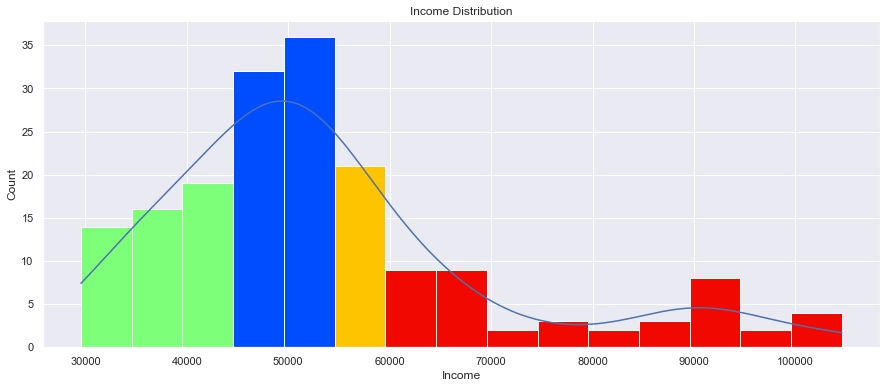

In [70]:
axs = sns.histplot(x = aerofit["Income"], kde = True) 
sns.set(rc={'figure.figsize':(15, 6)})

cmap = plt.get_cmap('jet')
low = cmap(0.5)
medium =cmap(0.2)
high = cmap(0.7)
outlier = cmap(0.9)

for p in axs.patches:
    x, w, h = p.get_x(), p.get_width(), p.get_height()
    if x <= np.quantile(aerofit["Income"], 0.25):
        p.set_facecolor(low)
    elif x > np.quantile(aerofit["Income"], 0.25) and x <= np.quantile(aerofit["Income"], 0.5):
        p.set_facecolor(medium)
    elif x > np.quantile(aerofit["Income"], 0.5) and x <= np.quantile(aerofit["Income"], 0.75):
        p.set_facecolor(high)
    else:
        p.set_facecolor(outlier)

axs.set(title = "Income Distribution")
plt.show()

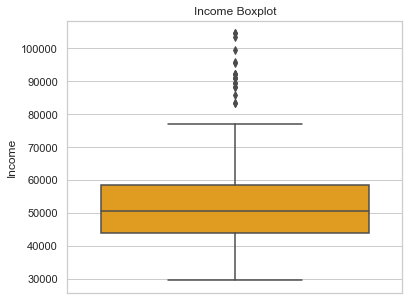

In [101]:
sns.boxplot(y = aerofit["Income"], color = "orange").set(title = "Income Boxplot")
sns.set(style="whitegrid", rc={'figure.figsize':(6, 5)}) #width, height
plt.show()

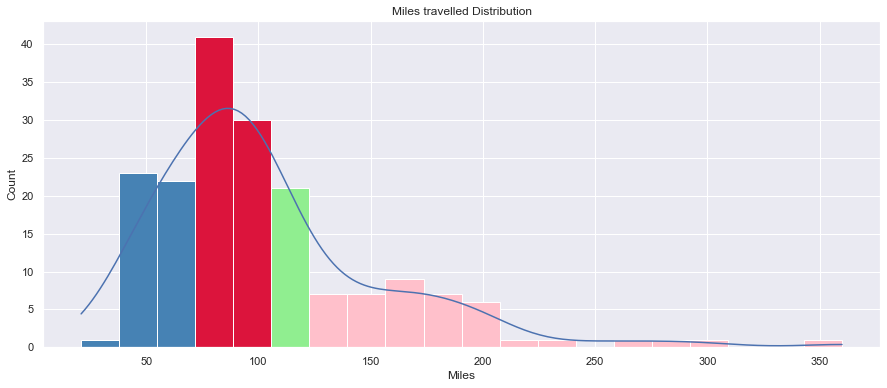

In [110]:
# Proving point #7 --> Huge std.dev
axs = sns.histplot(x = aerofit["Miles"], kde = True) 
sns.set(rc={'figure.figsize':(15, 6)})

for p in axs.patches:
    x, w, h = p.get_x(), p.get_width(), p.get_height()
    if x <= np.quantile(aerofit["Miles"], 0.25):
        p.set_facecolor('steelblue')
    elif x > np.quantile(aerofit["Miles"], 0.25) and x <= np.quantile(aerofit["Miles"], 0.5):
        p.set_facecolor('crimson')
    elif x > np.quantile(aerofit["Miles"], 0.5) and x <= np.quantile(aerofit["Miles"], 0.75):
        p.set_facecolor('lightgreen')
    else:
        p.set_facecolor('pink')

axs.set(title = "Miles travelled Distribution")
plt.show()

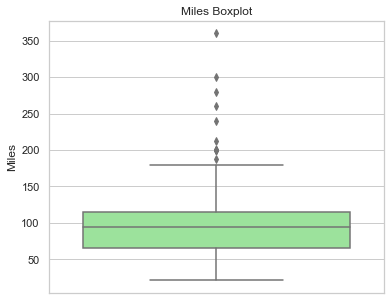

In [108]:
sns.boxplot(y = aerofit["Miles"], color = "lightgreen").set(title = "Miles Boxplot")
sns.set(style="whitegrid", rc={'figure.figsize':(6, 5)})
plt.show()

<h2><u><center> Business Insights - Visual </center></u></h2>

<h3><u> (A) Income and Gender </u></h3>

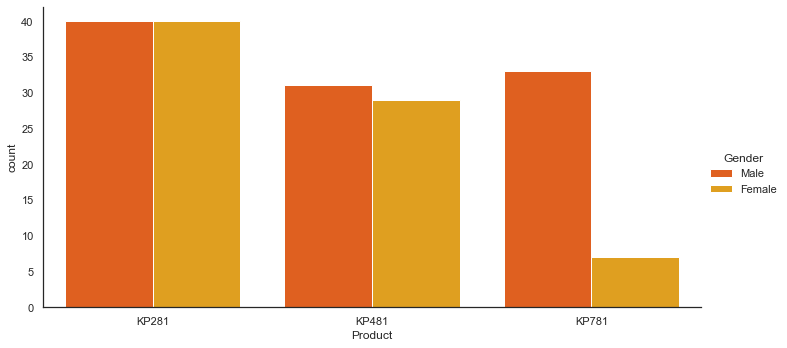

In [105]:
sns.catplot(data = aerofit, x = 'Product', hue = 'Gender', kind = "count", palette = "autumn", height = 5, aspect = 2)
plt.show()

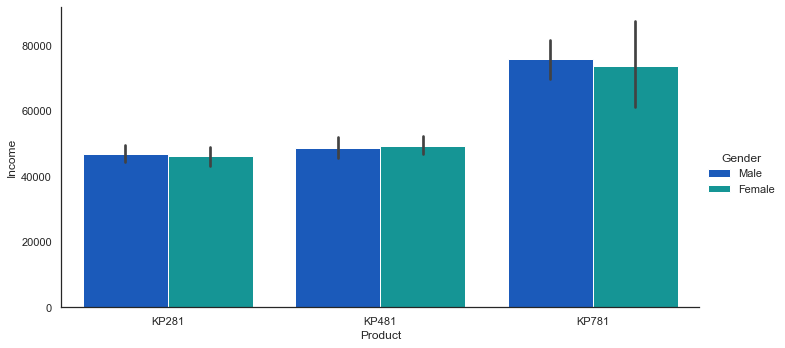

In [176]:
sns.catplot(data = aerofit, x = 'Product', y = 'Income', hue = 'Gender', kind = "bar", palette = "winter", height = 5, aspect = 2)
plt.show()

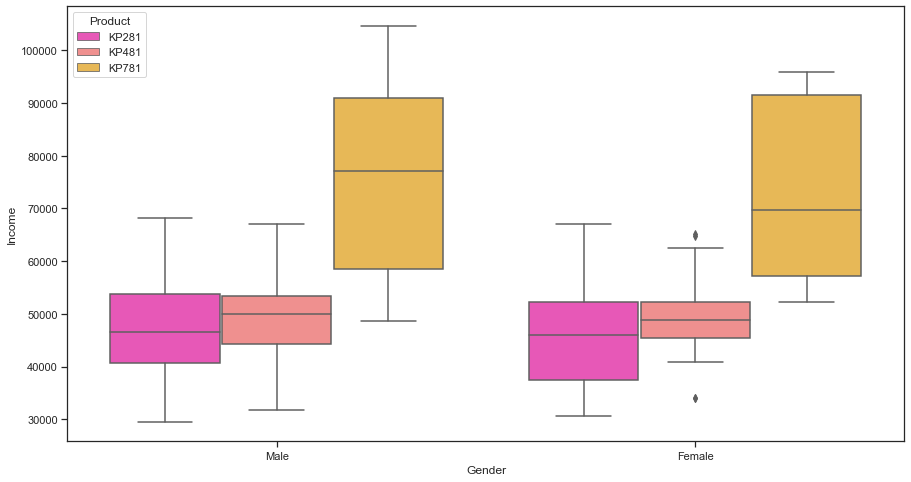

In [717]:
sns.boxplot(data = aerofit, y = "Income", x = "Gender", hue = "Product", palette = "spring")
plt.show()

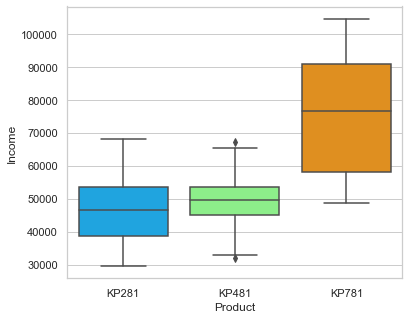

In [103]:
sns.set(style="whitegrid")
sns.boxplot(x = 'Product', y = 'Income', data = aerofit, palette = [cmap(0.3), cmap(0.5), cmap(0.75)])
plt.show()

In [707]:
aerofit["Income Bins"] = pd.cut(aerofit["Income"], 
                        bins = [round(aerofit["Income"].min() - 1, 5), 40_000, 50_000, 60_000, round(aerofit["Income"].max(), 5)])
aerofit["Income Bins"].value_counts(sort = False)

(29561, 40000]     32
(40000, 50000]     51
(50000, 60000]     55
(60000, 104581]    42
Name: Income Bins, dtype: int64

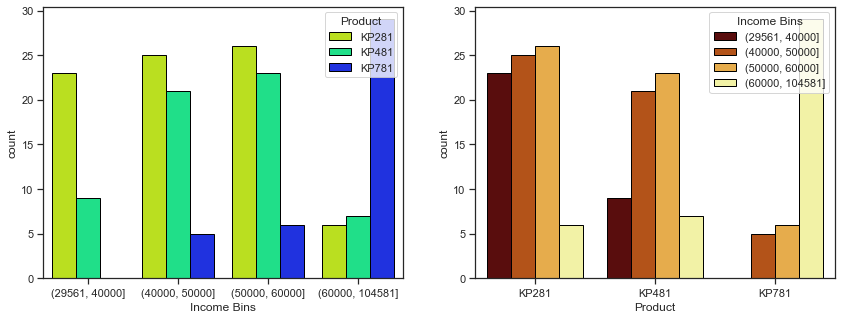

In [721]:
fig, axs = plt.subplots(nrows = 1,  ncols = 2, figsize = (8, 5))
sns.countplot(data = aerofit, x = "Income Bins", hue = "Product", 
              palette = "gist_rainbow", edgecolor = "black", ax = axs[0])
sns.countplot(data = aerofit, x = "Product", hue = "Income Bins", 
              palette = "afmhot", edgecolor = "black", ax = axs[1])
plt.subplots_adjust(right = 1.5)
plt.show()

<h4> Insights </h4>
<ul>
    <li>
        From our first plot, we can see that the distribution for the models KP281 and KP481 was almost evenly spread out between both the genders. However, we can clearly see that our costliest model (KP781) is clearly being bought by more males than females.
    </li>
    <li>
        To investigate this, we have plotted another graph which shows the distribution of our products but this time w.r.t average income and Gender. From the 2nd plot we can clearly see that it's not that our KP781 model is preffered by men over women, but rather when we compare by income, we see that the women who actually buy the costliest product have a similar (higher) income as compared to the men
    </li>
    <li>
        To further get into details, I have simply plotted a boxplot which compares the incomes of males and females. And we can see that females on average earn less as compared to males. This is why the count of females buying the highest model is low. <b> It's not that females don't prefer the costliest model, it's just that most females don't have the income to afford it </b>
    </li>
    <li> 
        <b> We can conclude that Gender doesn't play a big role in the sales of the treadmills, rather income does</b>
    </li>
</ul>

<h4> Recommendations </h4>
<ul> 
    <li> Buyers of the cheapest and moderately priced model (KP281, KP481) don't have a huge disparity in their incomes. The medians of the incomes is almost equal and the spread is similar for the most part. Therefore, we should try to convince the buyers of KP281 model to upgrade to KP481 by telling them about the benefits of the higher priced model. We can also offer <b> freebies</b> like 3 month free gym membership with KP481 so that the customers buy it instead of KP281</li>
    <li> We can use the <b> Decoy Item </b> strategy here, which is used in theatres while selling popcorn. Small and Medium popcorns are priced very close to each other so the customer thinks "why to buy small popcorn when I can pay little extra and get medium". Similarly, we can keep KP281 model as decoy by downgrading its specs and show customers that for just 250 extra you can get a much better deal</li>
    <li> While can show same adverstisment to the same consumer base for the first 2 models as their incomes are alike. However, we need to do targetted advertisement to the high income customers who buy our best model. We can offer stuff like premium 24/7 customer support for customer retention and to generate extra profit we can offer <b> luxury add-ons </b> (Leather handwrest, chrome buttons, rgb colour fitness tracker) etc. to the highest paying customers since they can afford it</li>
</ul>

<h3><u> (B) Income and Activity (fitness, miles, usage) </u></h3>

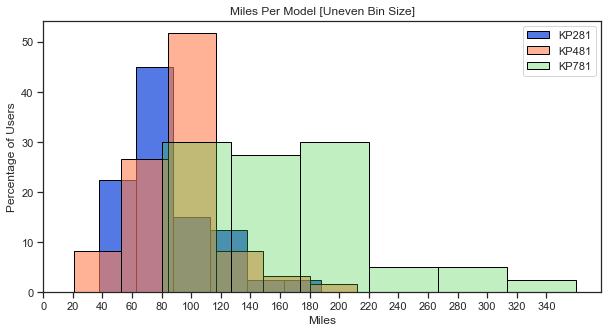

In [199]:
fig, axs = plt.subplots(nrows = 1,  ncols = 1, figsize = (10, 5))

# bins = np.arange(0, 360, 50)
sns.histplot(data = aerofit[aerofit['Product'] == "KP281"], x = 'Miles', bins = 6, stat='percent', 
             label = "KP281", color = "royalblue", alpha = 0.9, edgecolor = "black")
sns.histplot(data = aerofit[aerofit['Product'] == "KP481"], x = 'Miles', bins = 6, stat='percent', 
             label = "KP481", color = "coral", alpha=0.6, edgecolor = "black")
sns.histplot(data = aerofit[aerofit['Product'] == "KP781"], x = 'Miles', bins = 6, stat='percent', 
             label = "KP781", color = "limegreen", alpha=0.3, edgecolor = "black").set(
    title = "Miles Per Model [Uneven Bin Size]")

plt.legend(loc='upper right')
plt.ylabel("Percentage of Users")
plt.xticks(np.arange(0, 360, 20))
sns.set_style('ticks')
plt.show()

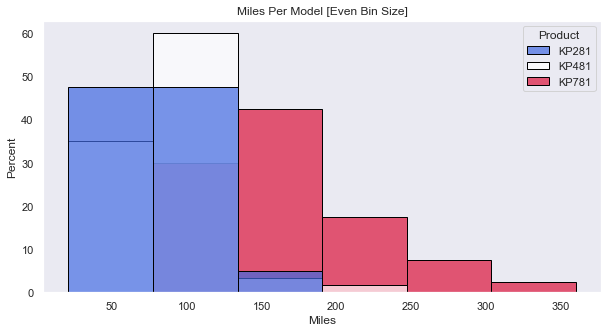

In [252]:
fig, axs = plt.subplots(figsize = (10, 5))
sns.histplot(data = aerofit, x = 'Miles', stat='percent', hue = "Product", bins = 6, 
             common_norm = False, common_bins = True, 
             alpha = 0.7 , palette = ["royalblue", "white", "crimson"], edgecolor = "black").set(
    title='Miles Per Model [Even Bin Size]')

sns.set_style('dark')
plt.show()

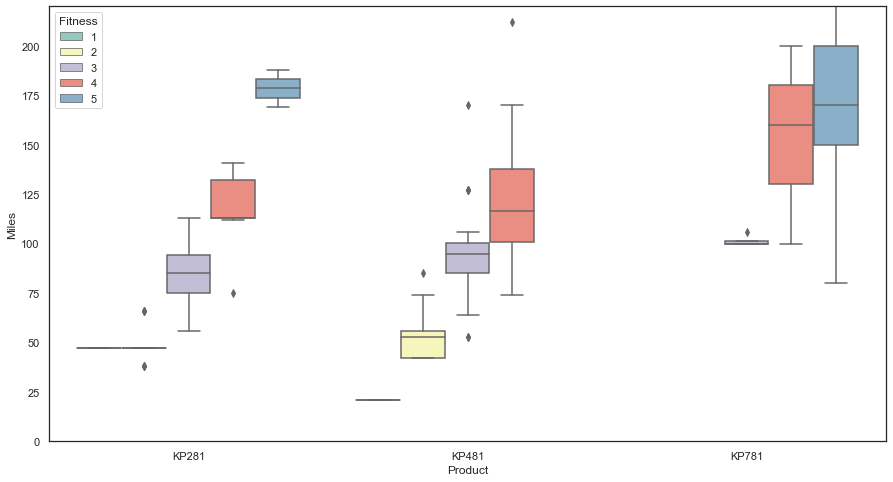

In [510]:
sns.boxplot(data = aerofit, x = 'Product', y = 'Miles', 
               hue = 'Fitness', palette = "Set3").set(ylim = (0, 220))
sns.set(rc={'figure.figsize':(15, 8)})
sns.set_style('white')
plt.show()

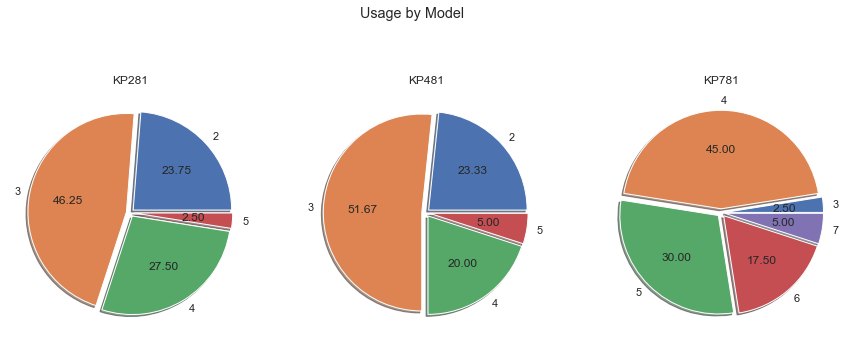

In [243]:
fig, axs = plt.subplots(nrows = 1,  ncols = 3,  figsize=(15, 6))

KP281_Usage = aerofit[aerofit["Product"] == "KP281"]["Usage"].value_counts().sort_index()
KP481_Usage = aerofit[aerofit["Product"] == "KP481"]["Usage"].value_counts().sort_index()
KP781_Usage = aerofit[aerofit["Product"] == "KP781"]["Usage"].value_counts().sort_index()

axs[0].pie(KP281_Usage, explode=([0.04] * len(KP281_Usage)), 
           labels = KP281_Usage.index, autopct="%.2f", shadow=True)
axs[1].pie(KP481_Usage, explode=([0.04] * len(KP481_Usage)), 
           labels = KP481_Usage.index, autopct="%.2f", shadow=True)
axs[2].pie(KP781_Usage, explode=([0.04] * len(KP781_Usage)), 
           labels = KP781_Usage.index, autopct="%.2f", shadow=True)

fig.suptitle("Usage by Model")
axs[0].set_title('KP281')
axs[1].set_title('KP481')
axs[2].set_title('KP781')

plt.show()

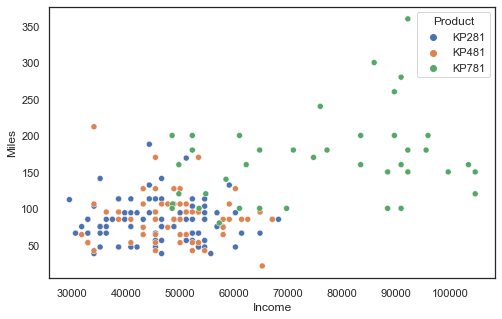

In [303]:
fig = plt.figure(figsize = (8, 5))
sns.scatterplot(data = aerofit, x = 'Income', y = 'Miles', hue = 'Product')
plt.show()

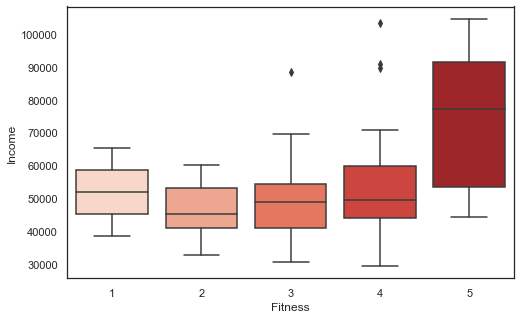

In [272]:
fig = plt.figure(figsize = (8, 5))
sns.boxplot(data = aerofit, y = 'Income', x = 'Fitness', palette = "Reds")
plt.show()

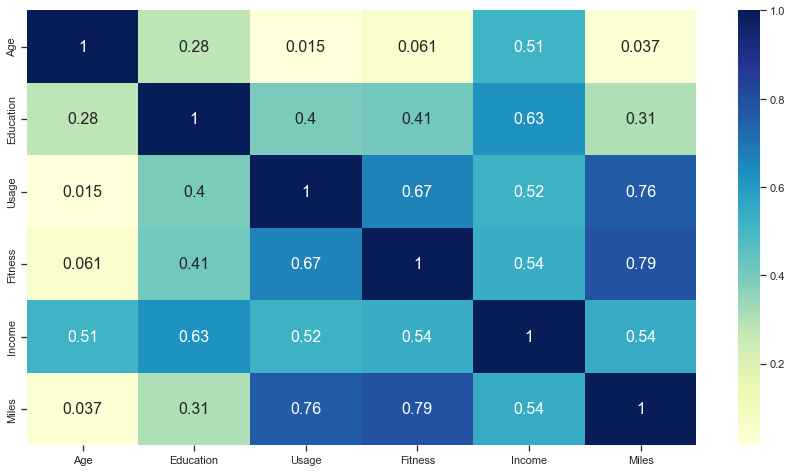

In [728]:
sns.heatmap(aerofit.corr(), cmap="YlGnBu", annot=True, annot_kws={"size": 16})
plt.show()

<h4> Insights </h4>
<ul>
    <li>
        Usage, Fitness and Miles parameters are highly correlated, which means a person classifying themselves high on the fitness scale can be readily assumed to be a power-user of the treadmill
    </li>
    <li>
        Almost all paramters tested are similar between KP281 and KP481, however, KP481 is preffered by slighty more active people than the KP281. Whereas, KP781 is highly preferred by active, hardcore users. 
    </li>
    <li> 
        High income users almost exclusively prefer the most preium model (irrespective of their fitness/usage), but, on average they are the most active users too
    </li>
</ul>

<h4> Recommendations </h4>
<ul> 
    <li> We can say that since richer people have more time on their hands to take care of their fitness, they prefer the most expensive model and make the most use of it too</li>
    <li> Athletic and active users should be recommended the KP781 model. The small minority of lower-income, but athletic people who use KP281 and KP481 models can be <b>offered EMI options</b> so that they go for the best performance KP781 model. </li>
    <li> Since the average usage and miles on the KP781 model are much higher than the others, as well as the fact that the KP781 model is being used by the high net worth customers; <b>extra care should be taken so that the parts of this model are robust and made to last long even in extreme usage</b> </li>
</ul>

<h3><u> (C) Education, Age and Marital Status </u></h3>

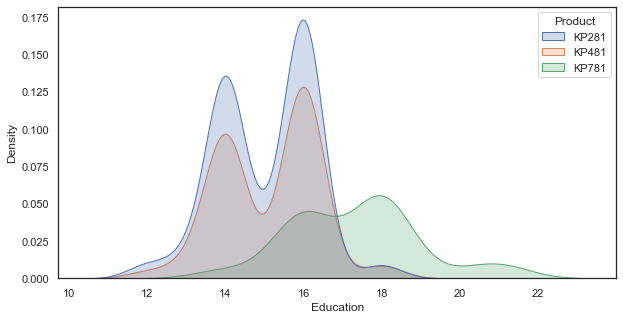

In [358]:
fig, axs = plt.subplots(figsize = (10, 5))
sns.kdeplot(x = 'Education', hue = 'Product', data = aerofit, fill = True)
plt.show()

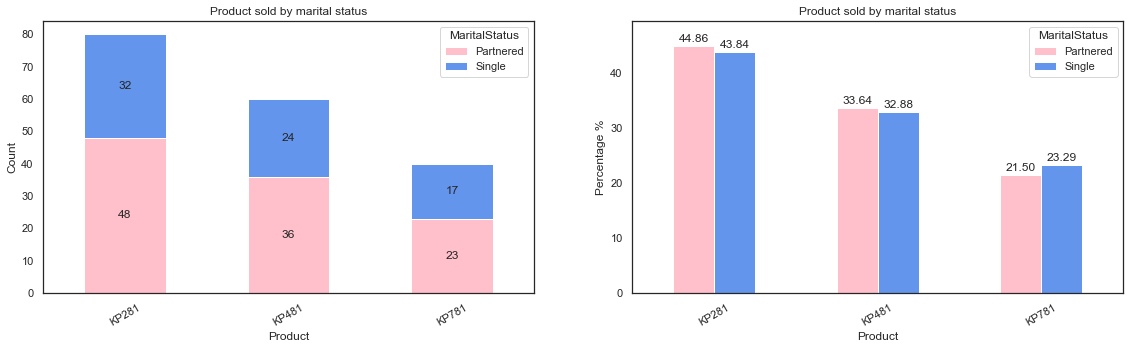

In [634]:
fig, axs = plt.subplots(nrows = 1, ncols = 2, figsize = (6, 5))

ct_1 = pd.crosstab(aerofit["Product"], aerofit["MaritalStatus"])
ct_1.plot(kind='bar', stacked=True, rot=30, color = ["pink", "cornflowerblue"], 
             title = "Product sold by marital status", figsize=(8,5), ax = axs[0])
axs[0].legend(title = 'MaritalStatus', bbox_to_anchor=(1, 1), loc='upper right')
axs[0].set_ylabel("Count")

for c in axs[0].containers:
    axs[0].bar_label(c, label_type='center') #setting bar label, default label comes on the edges
    

ct_2 = pd.crosstab(aerofit["Product"], aerofit["MaritalStatus"], normalize = 'columns').mul(100)
ct_2.plot(kind='bar', stacked=False, rot=30, color = ["pink", "cornflowerblue"], 
             title = "Product sold by marital status", figsize=(8,5), ax = axs[1])
axs[1].legend(title = 'MaritalStatus', bbox_to_anchor=(1, 1), loc='upper right')
axs[1].set_ylabel("Percentage %")
axs[1].margins(y=0.1) # make room for the labels

for c in axs[1].containers:
    axs[1].bar_label(c, label_type='edge', fmt='%.2f', padding = 2) #setting bar label, default label comes on the edges
    
plt.subplots_adjust(right = 2)

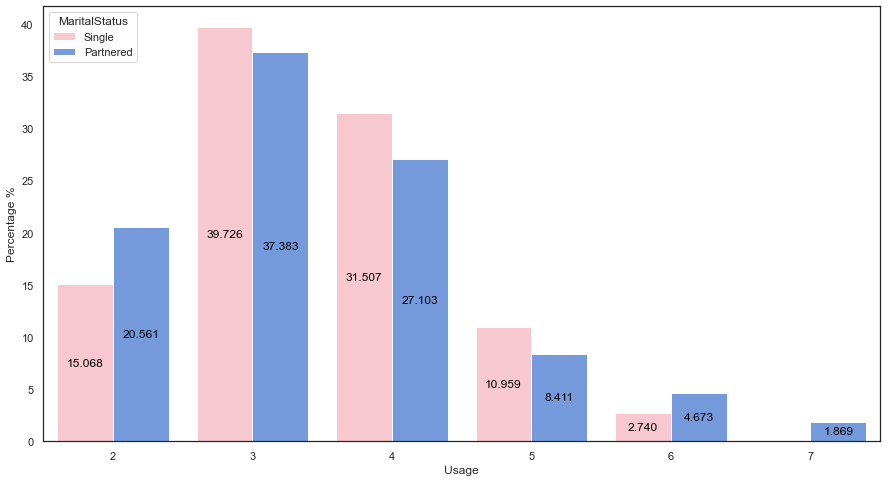

In [673]:
grouped = aerofit.groupby("MaritalStatus")[["Usage"]].value_counts(
    normalize = True).reset_index().rename(columns={0:'Percentage %'})

cmap = plt.get_cmap('hsv')

grouped["Percentage %"] = grouped["Percentage %"].mul(100)
ax = sns.barplot(data = grouped, x="Usage", y="Percentage %", hue="MaritalStatus", hue_order = ["Single", "Partnered"],
                palette = ["pink", "cornflowerblue"])
            #order = [2, 3, 4, 5, 6, 7])
    
for c in ax.containers:
    ax.bar_label(c, fmt='%.3f', label_type='center', weight='light', color='black')
    
plt.show()

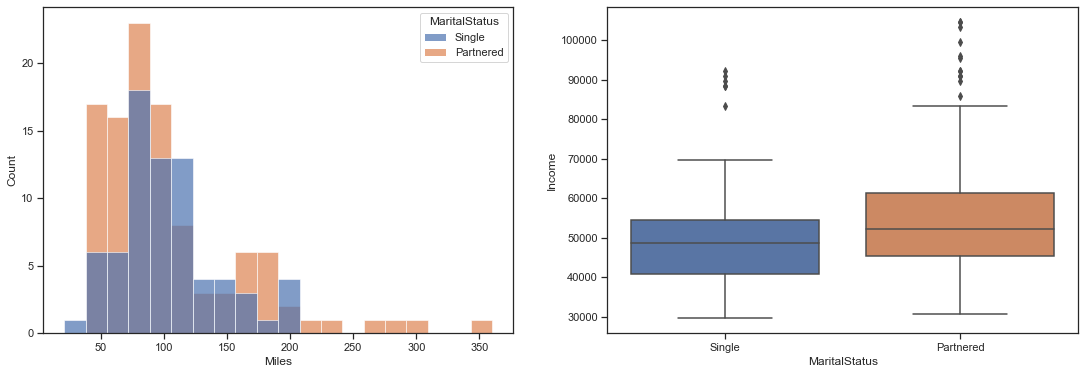

In [495]:
fig, axs = plt.subplots(nrows = 1, ncols = 2, figsize = (5, 6))
sns.histplot(data = aerofit, x = "Miles", hue = "MaritalStatus", multiple = "layer", alpha = 0.7, ax = axs[0])
sns.boxplot(data = aerofit, y = "Income", x = "MaritalStatus", ax = axs[1])

plt.subplots_adjust(right = 3)
plt.show()

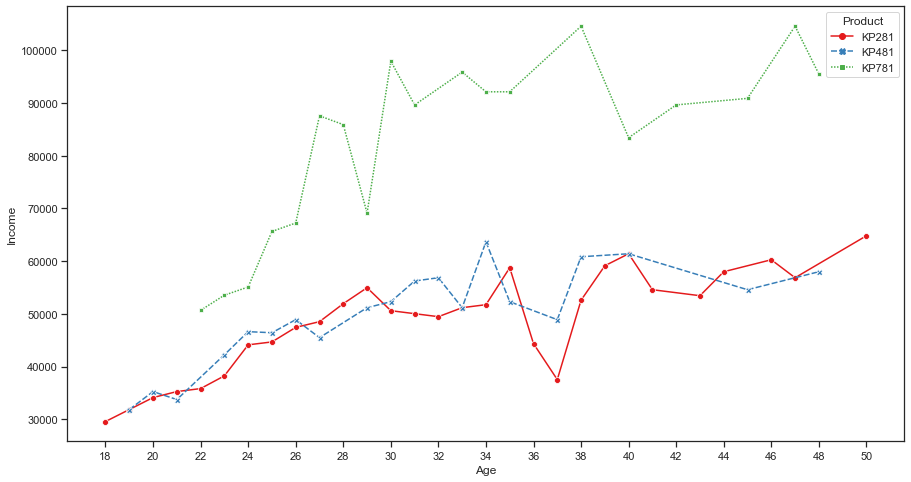

In [723]:
sns.lineplot(data = aerofit, y = "Income", x = "Age", hue = "Product", style = "Product", 
             markers=True, dashes = True, err_style = None, palette = "Set1")

plt.xticks(np.arange(aerofit["Age"].min(), aerofit["Age"].max() + 1, 2))
sns.set_style('ticks')
plt.show()

In [650]:
cut_bins = [-np.inf, 24, 30, 40, np.inf]
aerofit["Age Bins"] = pd.cut(aerofit['Age'], bins =  cut_bins, labels=['18-24', '24-30', '30-40', '40+'])
pd.crosstab(aerofit.Product, aerofit['Age Bins'], normalize = 'columns', margins = True)

Age Bins,18-24,24-30,30-40,40+,All
Product,,,,,
KP281,0.500000,0.424242,0.395833,0.500000,0.444444
KP481,0.314815,0.272727,0.479167,0.166667,0.333333
KP781,0.185185,0.303030,0.125000,0.333333,0.222222


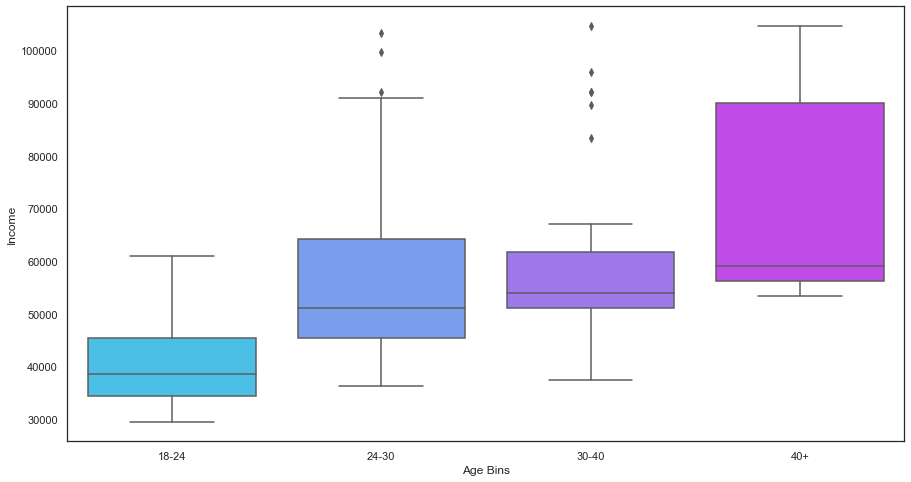

In [689]:
ax = sns.boxplot(data = aerofit, x = "Age Bins", y = "Income", palette = "cool")
plt.show()

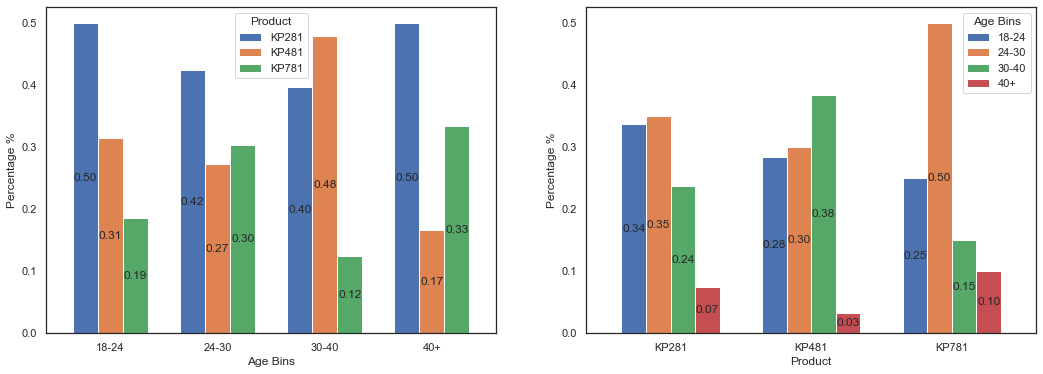

In [674]:
fig, axs = plt.subplots(nrows = 1, ncols = 2, figsize = (10, 6))

ct_1 = pd.crosstab(aerofit['Age Bins'], aerofit.Product, normalize = 'index', margins = False)
ct_1.plot(kind = "bar", rot=0, ylabel='Percentage %', width = 0.7, ax = axs[0])
for c in axs[0].containers:
    axs[0].bar_label(c, fmt = '%.2f', label_type='center')

ct_2 = pd.crosstab(aerofit.Product, aerofit['Age Bins'], normalize = 'index', margins = False)
ct_2.plot(kind = "bar", rot=0, ylabel='Percentage %', width = 0.7, ax = axs[1])
for c in axs[1].containers:
    axs[1].bar_label(c, fmt = '%.2f', label_type='center')

plt.subplots_adjust(right = 1.5)
plt.show()

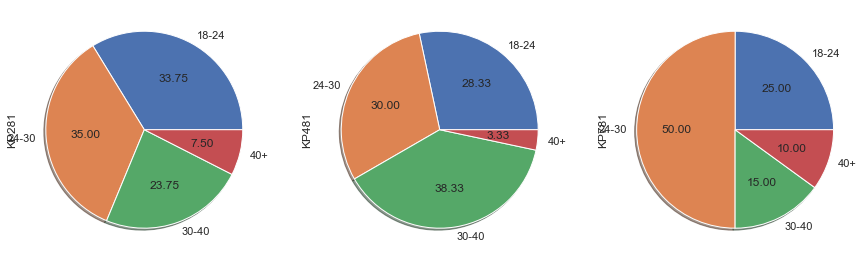

In [652]:
ct_2 = pd.crosstab(aerofit['Age Bins'], aerofit.Product, margins = False)
ct_2.plot(kind = "pie", subplots = True, autopct="%.2f", shadow=True, legend=False)
plt.show()

<h4> Insights </h4>
<ul>
    <li>
       As we saw from the heatmap already, education and income are highly co-related. We know that high income individuals prefer the KP781 model, hence people with higher education too have a high probability of buying the premium models.
    </li>
    <li>
        Married couples are more likely are equally likely to buy any model as single people.
    </li>
    <li>
        Married couples have lower usage as well as higher usage on the extreme ends of the spectrum. Married couples have higher miles on the products and are also monertarily much well off then single users
    </li>
    <li>
        In general, as age increases, income increases. Yet most people above 40 years of age prefer the cheapest model, and, the buyers of the most expensive model by a large stretch are in fact customers of age 24-30
    </li>
    <li>
        All customers prefer the cheapest model except those between the ages 30-40, who prefer the KP481 model
    </li>
    <li>
        Customers above the age of 40 do not prefer buying the mid-range model
    </li>
</ul>

<h4> Recommendations </h4>
<ul> 
    <li>
        People with less than 12 years of education should be recommended the cheaper models and anyone having more than 17 years of education should be recommended the highest model. For customers with 12-17 years of education, other parameters like income and usage should be taken into consideration
    </li>
    <li>
        Married couples' activity can be explained by the fact that 2 people are using the product instead of one person. They also have more income on average than single users so they can be pushed to buy the most expensive model for higher revenue.
    </li>
    <li>
        <b>There is a clear preference of the KP481 model by the age group of 30-40</b>. Recommendation systems should be designed which gives preference to this age group. Whereas, <b>customers above the age 40 should not be recommended it</b>
    </li>
    <li>
        KP281 model is liked by all age groups. <b>Age should not be a factor while recommending this model</b>
    </li>
    <li>
        <b>KP781 model is heavily prefered by the 24-30 age group</b>. They are the most active people and some are also wealthy enough to affort the priciest model. Apart from this, the 40+ age group are also buyers of this model
    </li>
</ul>

<h3><u> Business Insights - Theoretical (Contingency Table, Conditional Probability, and Customer Profile) </u></h3>

In [722]:
pd.crosstab(aerofit["Income Bins"], aerofit.Product, normalize = 'index', margins = True).round(2)

Product,KP281,KP481,KP781
Income Bins,,,
"(29561, 40000]",0.72,0.28,0.00
"(40000, 50000]",0.49,0.41,0.10
"(50000, 60000]",0.47,0.42,0.11
"(60000, 104581]",0.14,0.17,0.69
All,0.44,0.33,0.22


In [695]:
pd.crosstab(aerofit.Product, aerofit.Fitness, normalize = 'columns', margins = True).round(2)

Fitness,1,2,3,4,5,All
Product,,,,,,
KP281,0.5,0.54,0.56,0.38,0.06,0.44
KP481,0.5,0.46,0.40,0.33,0.00,0.33
KP781,0.0,0.00,0.04,0.29,0.94,0.22


In [696]:
pd.crosstab(aerofit['Age Bins'], aerofit.Product, normalize = 'index', margins = True).round(2)

Product,KP281,KP481,KP781
Age Bins,,,
18-24,0.50,0.31,0.19
24-30,0.42,0.27,0.30
30-40,0.40,0.48,0.12
40+,0.50,0.17,0.33
All,0.44,0.33,0.22


In [724]:
# Q. Given a user with gender = Male, find probability of buying given model
pd.crosstab(aerofit['Gender'], aerofit.Product, normalize = 'index', margins = True).round(2)
# Ans : KP-281 (38%), KP-481(30%), KP-781(32%)

Product,KP281,KP481,KP781
Gender,,,
Female,0.53,0.38,0.09
Male,0.38,0.30,0.32
All,0.44,0.33,0.22


In [726]:
# Q. Given a customer with age <30 and fitness >=3, probability of buying given model
cond = (aerofit["Age"] < 30) & (aerofit["Fitness"] >= 3)
aerofit[cond]["Product"].value_counts(normalize = True)

KP281    0.452632
KP781    0.284211
KP481    0.263158
Name: Product, dtype: float64

In [736]:
# Q. Do single males buy higher end models are compared to married males?
cond_1 = (aerofit["Gender"] == "Male") 
cond_2 = (aerofit["MaritalStatus"] == "Partnered")
cond_3 = (aerofit["MaritalStatus"] == "Single")

print("Married males")
print(aerofit[cond_1 & cond_2]["Product"].value_counts(normalize = True, sort = False))
print("\nSingle males")
print(aerofit[cond_1 & cond_3]["Product"].value_counts(normalize = True, sort = False))

Married males
KP281    0.344262
KP481    0.344262
KP781    0.311475
Name: Product, dtype: float64

Single males
KP281    0.441860
KP481    0.232558
KP781    0.325581
Name: Product, dtype: float64


<h4> Final Conclusions </h4>
<ul>
    <li>
       According to my analysis, Income and fitness(Miles/Usage/Fitness -- all are extremely co-rrelated) are the two most important factors which decide which product will be bought. Age also plays a role, especially for the KP-481 Model
    </li>
    <li>
        As we have previously seen from the graphs (where I have used crosstab already), for low income(30k - 40k) customers price matters a lot and they won't buy the expensive models [0% probability]. For high income people, about 70% of them buy the highest-end model
    </li>
    <li> 
        People who ranked themselves as a "5" fitness level buy the most exponsive model in large numbers. <b>People who rank themselves below a "4" fitness level almost never buy the most expensive model</b>. There is less co-rrelation between the models when compared with fitness for the other 2 models
    </li>
    <li>
        It seems like the <b>KP481 acts as a Decoy</b>, as the people buying it aren't very different from the people buying KP281 model. Only outlier is that people in ages 30-40 are major buyers of this product. We need to convert these people to buy our model expensive model
    </li>
</ul>

<h3> Imp links for reference </h3>

[Scaler Matplotlib Colour Guide](https://www.scaler.com/topics/matplotlib/colormaps-matplotlib/)<br>
[Matplotlib colormap official guide](https://matplotlib.org/stable/tutorials/colors/colormaps.html)<br>
[Matplotlib all color list](https://matplotlib.org/stable/gallery/color/named_colors.html)<br>
[Seaborn Style and Colour Tutorial](https://www.geeksforgeeks.org/seaborn-style-and-color/)<br>
[Piechart tutorial](https://machinelearningknowledge.ai/matplotlib-pie-chart-complete-tutorial-for-beginners/)<br>
[Pie and donut chart labelling guide](https://matplotlib.org/stable/gallery/pie_and_polar_charts/pie_and_donut_labels.html)<br>
[Labelling Bins in Histplot](https://stackoverflow.com/questions/66446681/python-use-bins-from-one-sns-histplot-for-another-extract-bin-information)<br>
[Labelling Bins in Histplot-2](https://stackoverflow.com/questions/20335290/matplotlib-plot-set-x-ticks)<br>
[Bbox to anchor](https://stackoverflow.com/questions/39803385/what-does-a-4-element-tuple-argument-for-bbox-to-anchor-mean-in-matplotlib/39806180#39806180)<br>
[Colour bars in Hisplot](https://stackoverflow.com/questions/43831029/matplotlib-seaborn-histogram-using-different-colors-for-grouped-bins/47391815)<br>
[Colour bars in histplot - 2](https://stackoverflow.com/questions/25396786/how-to-pick-unique-colors-of-histogram-bars-in-matplotlib)<br>
[Plot multiple histplots/distplots](https://stackoverflow.com/questions/63373194/how-to-plot-percentage-with-seaborn-distplot-histplot-displot)<br>
[Create Plots with percent labels](https://medium.com/swlh/how-to-create-percentage-plots-for-visualizing-your-data-in-python-f0d894d7c7bb)<br>
[Displaying custom values on bar plot](https://stackoverflow.com/questions/43214978/how-to-display-custom-values-on-a-bar-plot)<br>
[Using crosstab to create barplots](https://stackoverflow.com/questions/43544694/using-pandas-crosstab-to-create-a-bar-plot)<br>
[Pairplot guide](https://towardsdatascience.com/seaborn-pairplot-enhance-your-data-understanding-with-a-single-plot-bf2f44524b22)<br>
[Crosstab Guide](https://pbpython.com/pandas-crosstab.html)<br>
[Show Meanline in Boxplot](https://stackoverflow.com/questions/29777017/show-mean-in-the-box-plot-in-python)<br>
[Figure Suptitle Guide](https://stackoverflow.com/questions/55767312/how-to-position-suptitle)<br>
[Plotting categorical variables - Guide](https://towardsdatascience.com/a-complete-guide-to-plotting-categorical-variables-with-seaborn-bfe54db66bec#69ab)<br>
[Seaborn official plotting guide](https://seaborn.pydata.org/tutorial/relational.html)<br>
[Seaborn Multivariate analysis guide](https://towardsdatascience.com/10-must-know-seaborn-functions-for-multivariate-data-analysis-in-python-7ba94847b117)<br>